In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import pyplot as plt

from scipy import stats

In [2]:
path = "C:\\Users\\jgonzalez\\Documents\\Indicadores\\data\\"

In [3]:
data_precip = pd.read_excel(path+'ATP01PT01-PT01_(Tungurahua)_Precipitación_Horario.xlsx',header=11)
data_precip = data_precip[["Fecha","Valor"]]
data_precip = data_precip.dropna()
data_precip.index = data_precip["Fecha"]
data_precip = data_precip.rename(columns={'Valor': 'mm'})
data_precip = data_precip.drop(columns=["Fecha"])
#data_precip = data_precip.resample("D").sum()


In [4]:
#data_caudal = pd.read_excel(path+'ATP01HI02-VERTEDERO_EN_HUMEDAL_TUNGURAHUA_Caudal_Horario.xlsx',header=11)
data_caudal = pd.read_excel(path+'ATP01HI01-Tungurahua_Caudal_Horario.xlsx',header=11)

data_caudal = data_caudal[["Fecha","Valor"]]
data_caudal = data_caudal.dropna()
data_caudal.index = data_caudal["Fecha"]
data_caudal = data_caudal.rename(columns={"Valor": "caudal"})
data_caudal = data_caudal.drop(columns=["Fecha"])
#data_caudal = data_caudal.resample("D").mean()


In [5]:
data = pd.concat([data_precip, data_caudal], axis=1)
data = data.loc[data.index > "2018"]
data

,mm,caudal
Fecha,,
2018-01-01 01:00:00,1.6,189.436245
2018-01-01 02:00:00,0.6,255.998933
2018-01-01 03:00:00,0.0,376.990625
2018-01-01 04:00:00,0.0,413.139396
2018-01-01 05:00:00,0.0,350.411487
...,...,...
2023-12-13 19:00:00,0.0,57.679556
2023-12-13 20:00:00,0.0,57.729311
2023-12-13 21:00:00,0.0,57.756969


In [6]:
precip_mensual = data.mm.resample("M").sum()

# Q95 dry

In [9]:
precip_mensual_grouped = precip_mensual.groupby([precip_mensual.index.year])
years = []
precips =[]
q95_dry = []

for year,q in precip_mensual_grouped:
    years.append(year[0])

    #print("\n",year)
    caudal_ranked = pd.DataFrame(q.sort_values())
    caudal_ranked["mes"] = caudal_ranked.index.month
    caudal_ranked = caudal_ranked.reset_index()
    caudal_ranked = caudal_ranked.drop("Fecha",axis=1)
    caudal_ranked = caudal_ranked.head(5)
    #print(caudal_ranked)

    acierto = False
    for mes in caudal_ranked["mes"].values:
        #print("mes analizandose",mes, "mes anterior",mes-1)
        if (mes-1) in caudal_ranked["mes"].values:
            p = caudal_ranked.mm.loc[caudal_ranked.mes == mes].values[0]
            precips.append(p)
            #print("precip",p)

            q = data.caudal.loc[(data.index.year == year) & (data.index.month == mes)]
            q95_dry.append(np.percentile(q,95))
            #print("q95",np.percentile(q,95))
            acierto =True
            break

    if acierto == False:
        print("Error")
        xxx = input("error")


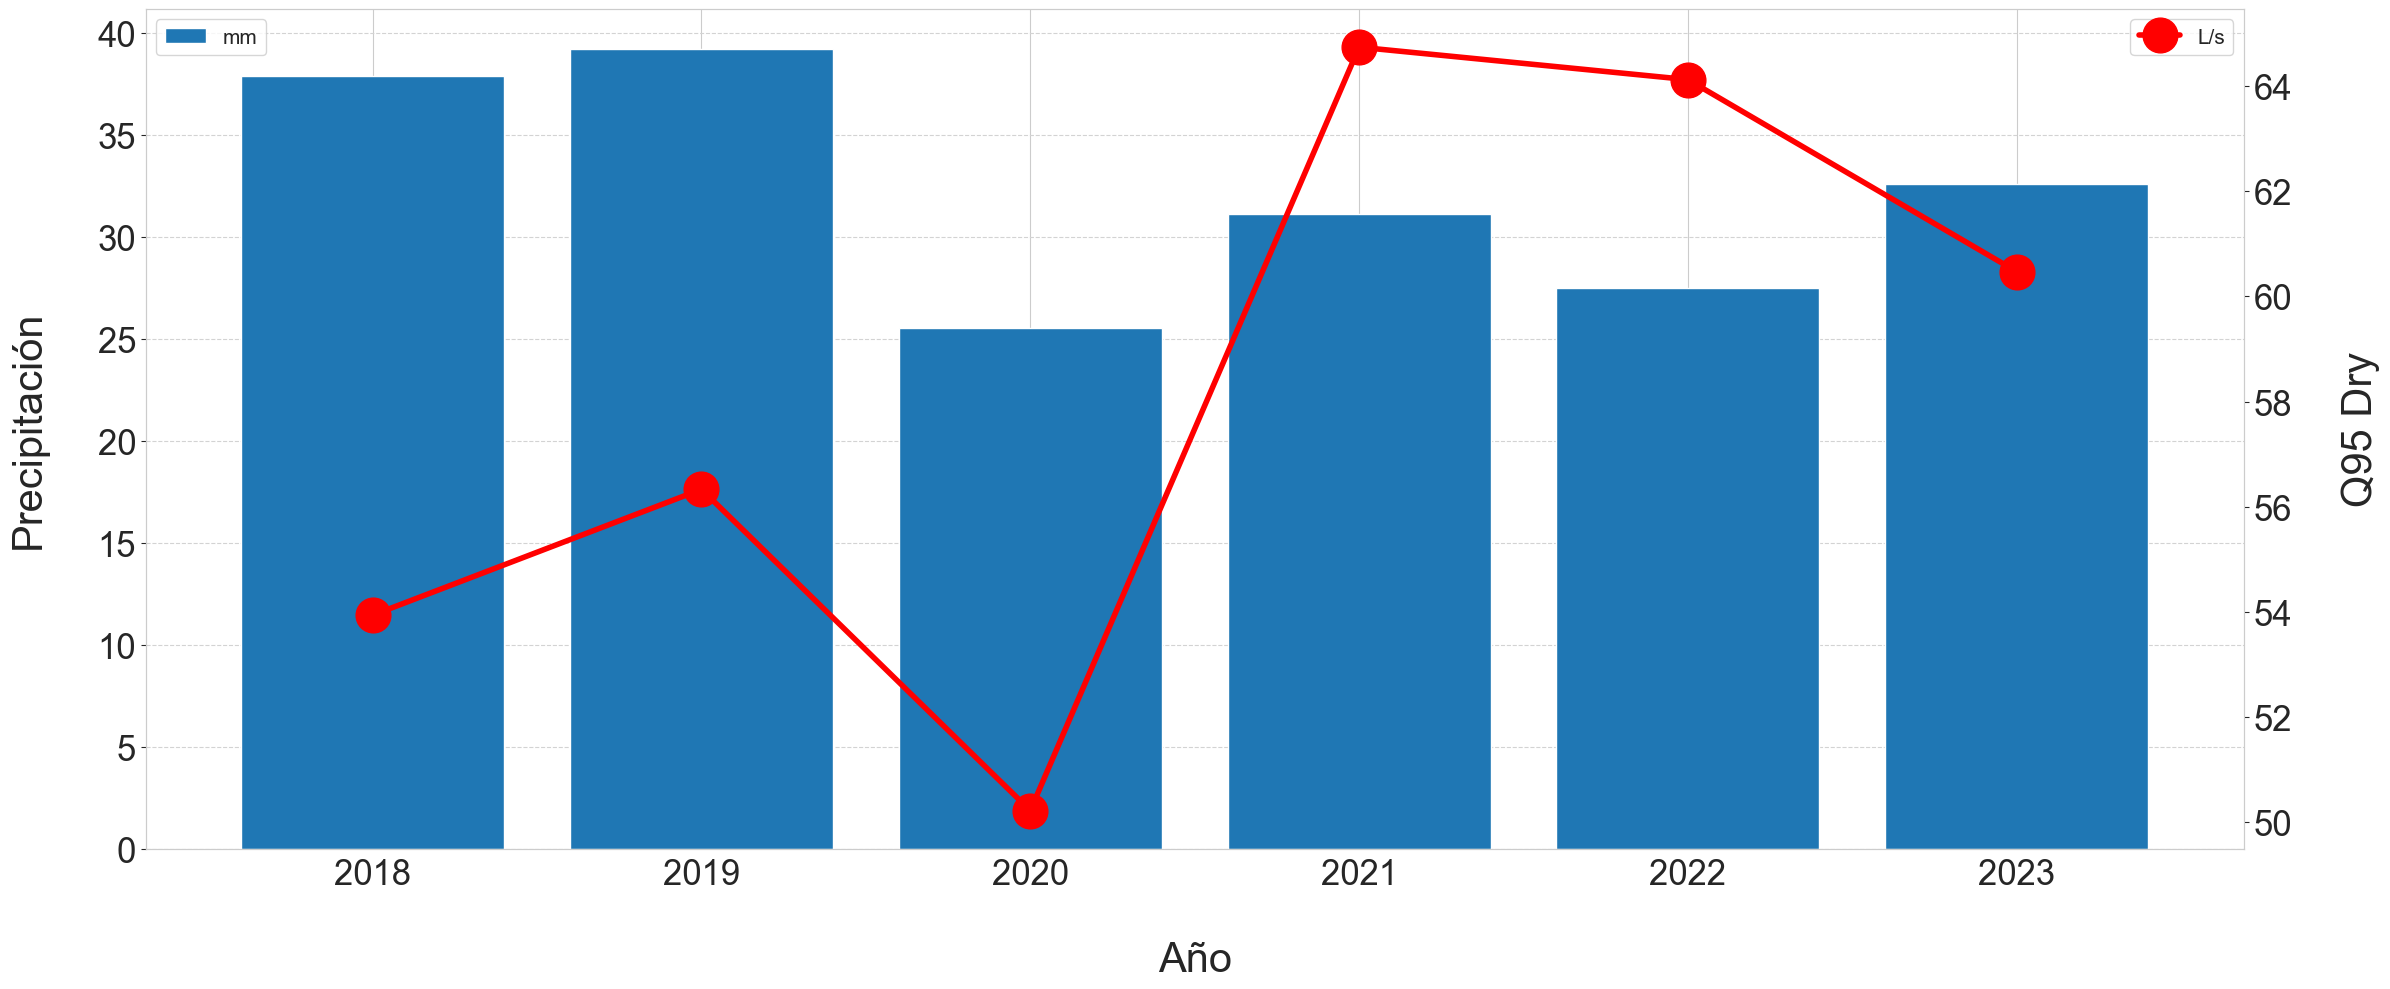

In [8]:
fig, ax = plt.subplots(figsize=(24,10))
ax2 = ax.twinx()

#ax.set_title('my title',size=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('\nAño',size=30)

ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
ax.set_ylabel('Precipitación\n',size=30)
ax.legend(['mm'], loc='upper left',prop={'size': 15})

ax2.plot(years,q95_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
ax2.set_ylabel('\nQ95 Dry',size=30)
ax2.legend(['L/s'], loc='upper right',prop={'size': 15})



ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
#plt.savefig(".pdf")
#plt.savefig(".png")
plt.grid(False)
plt.show()

# Moda dry

In [24]:
precip_mensual_grouped = precip_mensual.groupby([precip_mensual.index.year])
years = []
precips =[]
moda_dry = []

for year,q in precip_mensual_grouped:
    years.append(year[0])

    #print("\n",year)
    caudal_ranked = pd.DataFrame(q.sort_values())
    caudal_ranked["mes"] = caudal_ranked.index.month
    caudal_ranked = caudal_ranked.reset_index()
    caudal_ranked = caudal_ranked.drop("Fecha",axis=1)
    caudal_ranked = caudal_ranked.head(5)
    #print(caudal_ranked)

    acierto = False
    for mes in caudal_ranked["mes"].values:
        #print("mes analizandose",mes, "mes anterior",mes-1)
        if (mes-1) in caudal_ranked["mes"].values:
            p = caudal_ranked.mm.loc[caudal_ranked.mes == mes].values[0]
            precips.append(p)
            #print("precip",p)

            q = np.round(data.caudal.loc[(data.index.year == year) & (data.index.month == mes)],0)
            #q = data.caudal.loc[(data.index.year == year) & (data.index.month == mes)]
            moda = stats.mode(q.values)[0][0]
            moda_dry.append(moda)
            #print("moda_dry",moda)
            acierto =True
            break

    if acierto == False:
        print("Error")
        xxx = input("error")


C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_8732\1238494416.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(q.values)[0][0]
C:\Users\jgonzalez\AppData\Local\Temp\ipykernel_8732\1238494416.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning

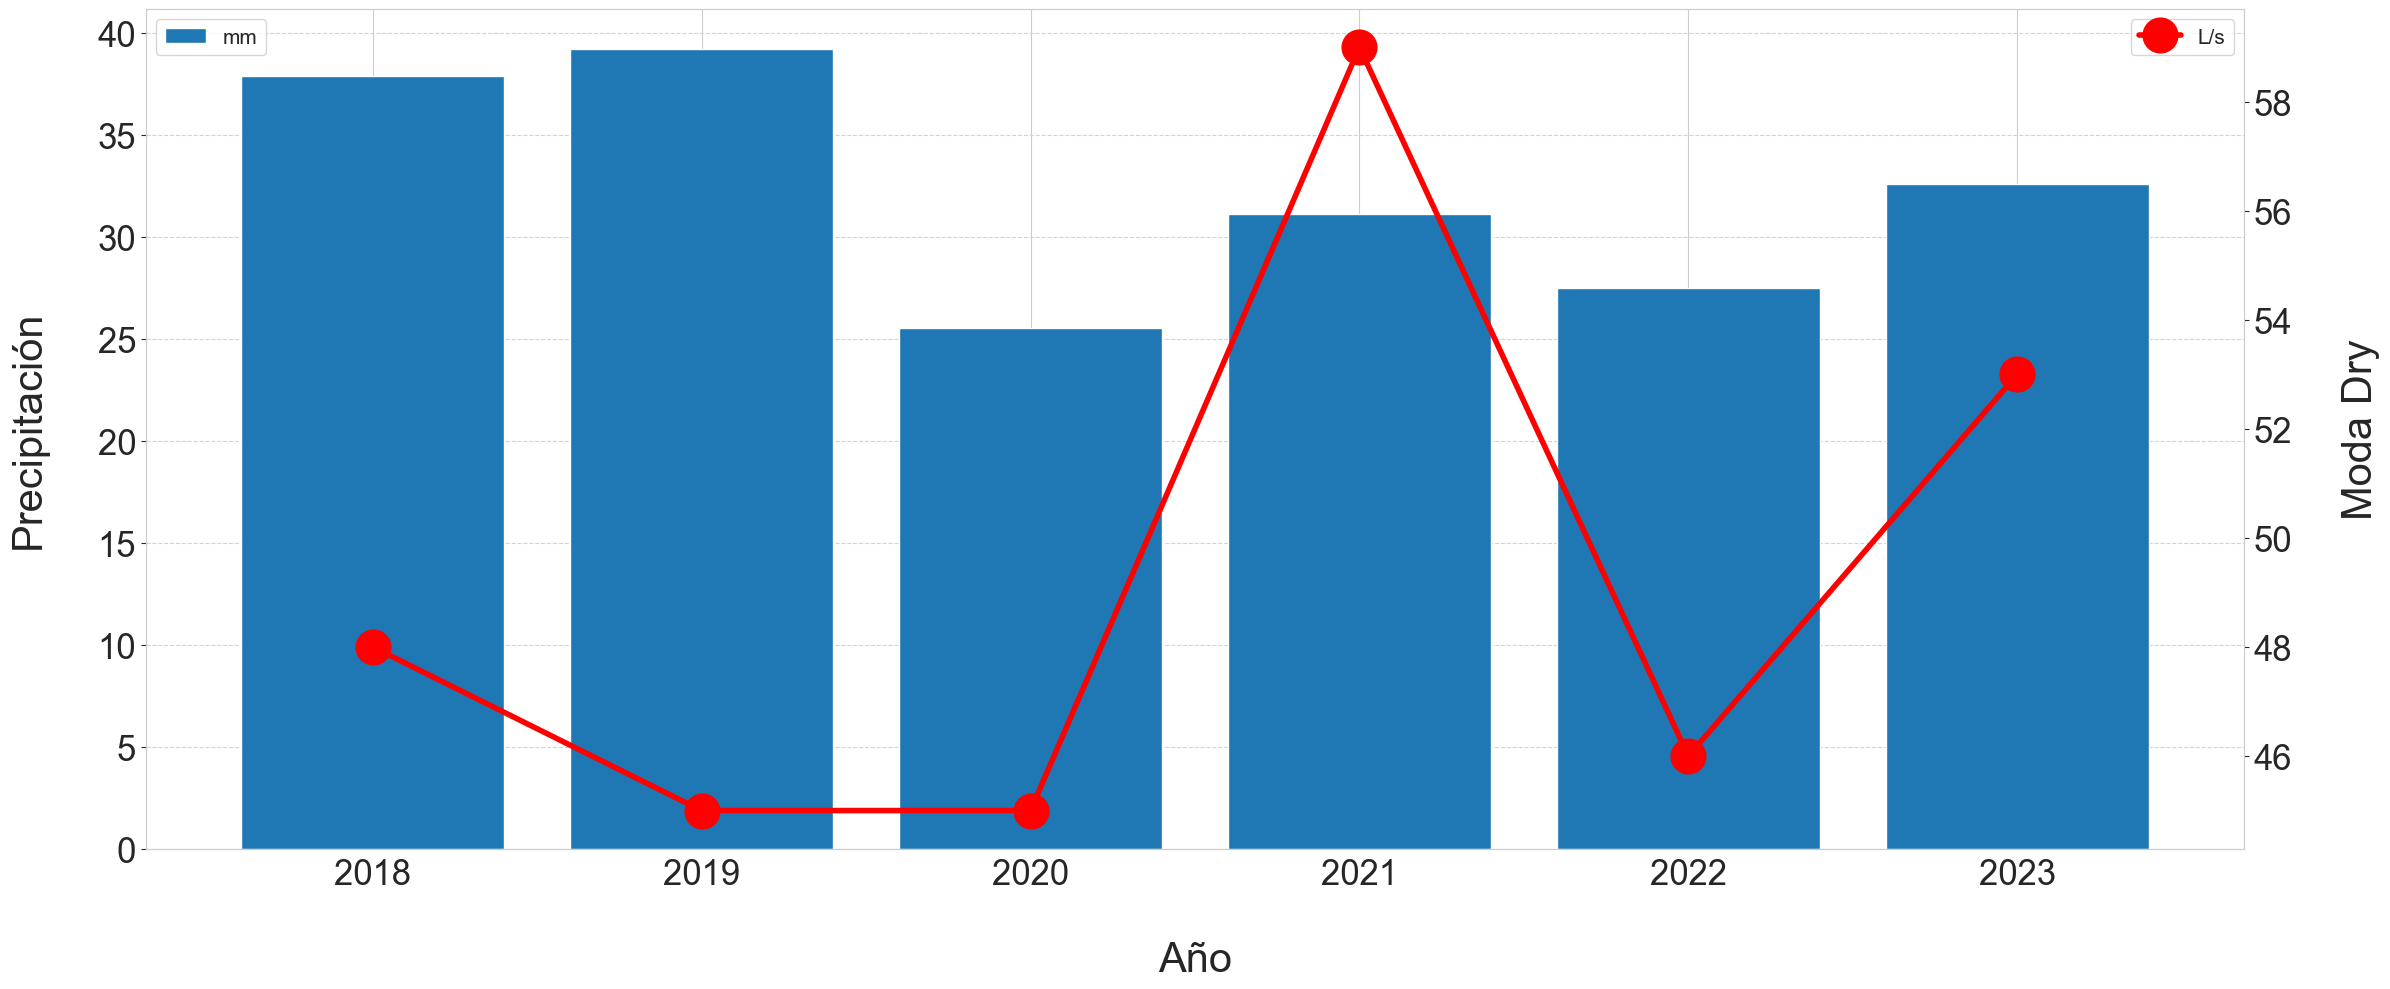

In [25]:
qfig, ax = plt.subplots(figsize=(24,10))
ax2 = ax.twinx()

#ax.set_title('my title',size=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('\nAño',size=30)

ax.bar(years,precips)#, color='red', marker='o',linewidth=4,markersize=20)
ax.set_ylabel('Precipitación\n',size=30)
ax.legend(['mm'], loc='upper left',prop={'size': 15})

ax2.plot(years,moda_dry,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
ax2.set_ylabel('\nModa Dry',size=30)
ax2.legend(['L/s'], loc='upper right',prop={'size': 15})



ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
#plt.savefig(".pdf")
#plt.savefig(".png")
plt.grid(False)
plt.show()

In [ ]:
plt.plot(moda_dry,q95_dry,"o")